In [4]:
import pandas as pd
Breakfast=pd.DataFrame({"resp":[8,7,9,13,14,16,12,17,10,12,16,15],
'Trt':sum([["1"]*4, ["2"]*4, ["3"]*4],[])} )

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
Model1=ols('resp ~ Trt', data=Breakfast).fit(alpha=0.01)
anova_table = sm.stats.anova_lm(Model1, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Trt,64.666667,2.0,4.995708,0.03472
Residual,58.250000,9.0,NaN,NaN


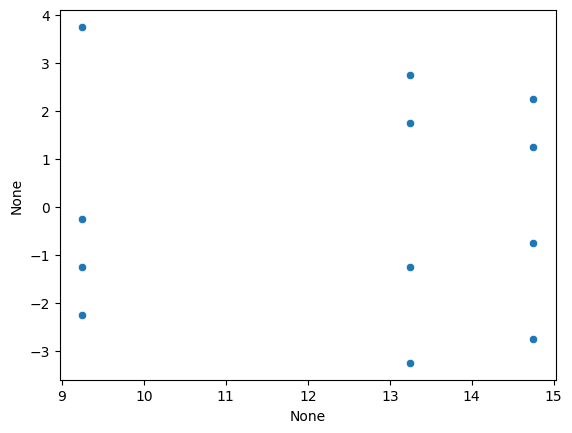

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=Model1.fittedvalues, y=Model1.resid)
plt.show()

# Levene Test
A levene test is equivalent to a one way ANOVA with the dependent variable being the absolute value of the difference between each observation Y_ij and the mean/median of the group to which the observation Y_ij belongs

In [8]:
from scipy.stats import levene
levene(Breakfast[Breakfast.Trt=='1'].resp,
Breakfast[Breakfast.Trt=='2'].resp,
Breakfast[Breakfast.Trt=='3'].resp)

LeveneResult(statistic=np.float64(0.18461538461538465), pvalue=np.float64(0.8344946957087622))

Normality assumption can be checked using histogram and QQ plot of the residuals

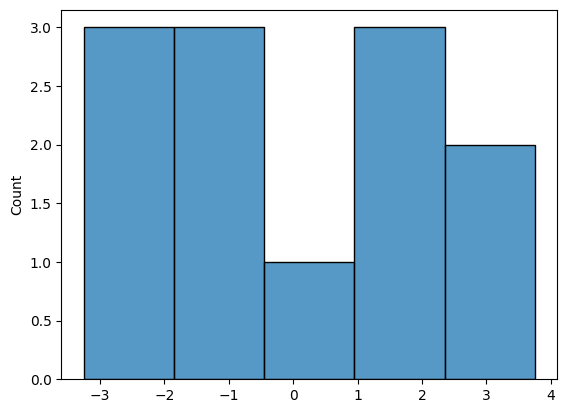

In [9]:
sns.histplot(Model1.resid)
plt.show()

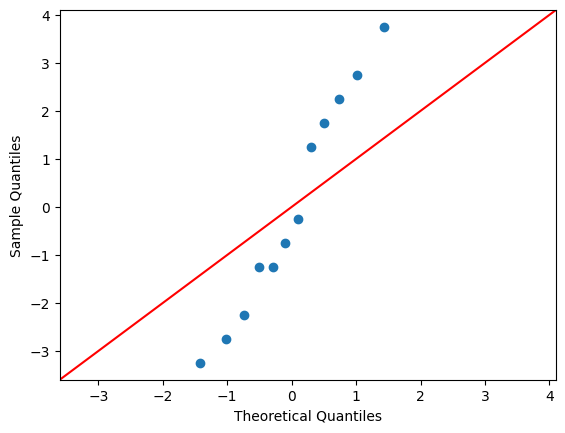

In [11]:
sm.qqplot(Model1.resid, line="45")
plt.show()

In [ ]:
# Shapiro-Wilk's method
from scipy.stats import shapiro
normality=shapiro(Model1.resid)
normality.pvalue

np.float64(0.6389576721047183)

# 2 way ANOVA

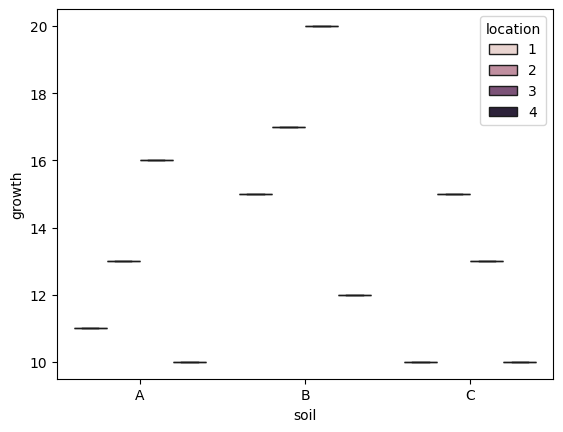

In [14]:
seedlings=pd.read_csv("../Datasets/Soil.csv")
sns.boxplot(x="soil", y="growth", hue="location", data=seedlings)
plt.show()

In [17]:
Model2=ols('growth ~ soil+location', data=seedlings).fit()
anova_table = sm.stats.anova_lm(Model2, typ=1)
print(anova_table)

           df     sum_sq    mean_sq         F    PR(>F)
soil      2.0  38.000000  19.000000  2.113068  0.183317
location  1.0   1.066667   1.066667  0.118628  0.739406
Residual  8.0  71.933333   8.991667       NaN       NaN


In [ ]:
# model assumptions check is an exercise for YOU to do